#Simulación de distribución de velocidades de un gas caliente
##José Alfonso Acosta Peñaloza
>Resumen: En el presente informe se utiliza el código del libro _The Art of Molecular Dynamics Simulation de Rapapor_ para simular el comportamiento de un gas de discos suaves que interactúan de acuerdo al potencial de Lennard-Jones. Se observó cuál era el comportamiento de la velocidad de las partículas y se estableció una representación del movimiento.

## Introducción
Los átomos en un gas están sujetos a distintas fuerzas cuando  están en el límite de separación y en un pequeña separación. Un fuerza de dispersión cuando se encuentran distanciados y la fuerza de repulsión de pauli cuando están muy cerca. El potencial de Lennard-Jones establece una relación matemática que modela éste comportamiento. 

El potencial de L-J fue propuesto en 1924 por John Lennard-Jones y tiene la forma: $ V(r) = 4a[(b/r)^{12} - (b/r)^6] $

__Potencial de Lenard-Jones__ 
![alt text](https://raw.githubusercontent.com/jjosealf94/Imagenes/master/potential_LJ.png)

Tomado de: https://es.wikipedia.org/wiki/Potencial_de_Lennard-Jones

El código de la simulación utiliza el método de integración de salto de rana, el cual es un métodos de para solucionar ecuaciones diferenciales de la forma:   $X^" = f(X)$ . Cómo hipótesis se toma como base teórica que la velocidad de las partículas en un gas caliente se comporta de acuerdo a la distribución de **Rayleigh**, esta distribución representa una densidad de probabilidad con parámetro de escala.

##Objetivo:

+ estudiar la distribución de probabilidad de las las rapideces de las partículas del gas y comprobar que en el equilibrio se comporta como una distribución de Rayleigh. 

##Análisis
Para el experimento se establecieron los siguientes parámetros para la simulación: stepAvg -> 2, stepLimit -> 500, initUcell -> 40 40, density -> 0.8. Al realizar la simulación, se creó un archivo de nombre Rayleigh.csv que contiene por columnas respectivamente las posiciones en X y Y y las velocidades respectivas de cada una de las 1600 partículas simuladas en cada instante. A continución se realiza el análisis de los datos.

In [10]:
%pylab inline
import scipy.stats
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importación de los datos
data=genfromtxt("./Rayleigh.csv",delimiter=",")

In [40]:
#Asignación y separación de los datos importados
x=data[:,0]
y=data[:,1]
vx=data[:,2]
vy=data[:,3]
velocity=(vx**2+vy**2)**0.5

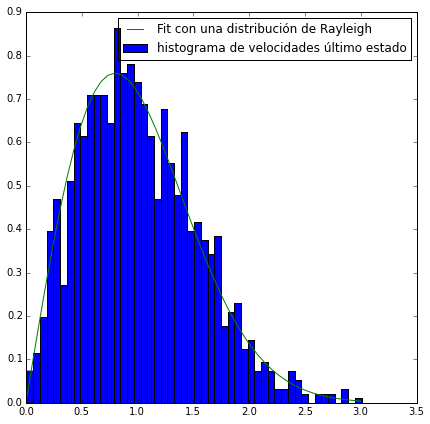

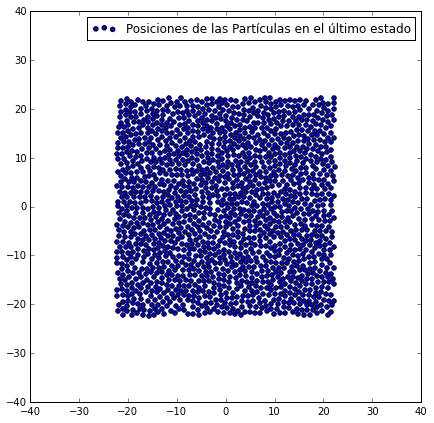

In [52]:
#Función de Rayleigh con parámetro ajustable
def rl(x,a):
    return (x/a)*exp((-x**2)/(2*a))

#Se realiza el histograma de velocidad en el último estado de la simulación y se realiza un fit
figure(1,figsize(7,7))
finalvelocity=velocity[-1601:-1]
histo=hist(finalvelocity,bins=50,normed='true',label='histograma de velocidades último estado')
Yd=histo[0]
Xd=histo[1][0:50]
Rfit= curve_fit(rl,Xd,Yd)
t = linspace(0,3,50)
plot(t, rl(t, Rfit[0]),label='Fit con una distribución de Rayleigh')
legend()
show()

#Se representa el último estado de las partículas
figure(1,figsize(7,7))
scatter(x[-1601:-1],y[-1601:-1],label='Posiciones de las Partículas en el último estado')
xlim(-40,40)
ylim(-40,40)
legend()
show()



Enter the initial state(1-251)=9
Enter the final state (1-251)=10


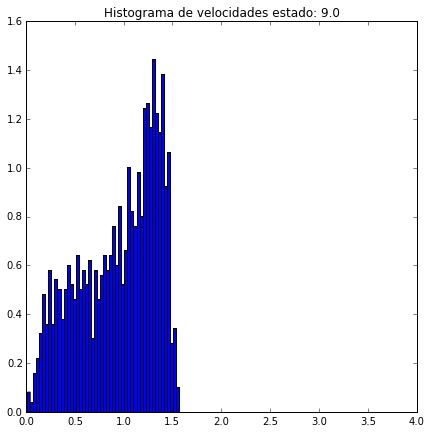

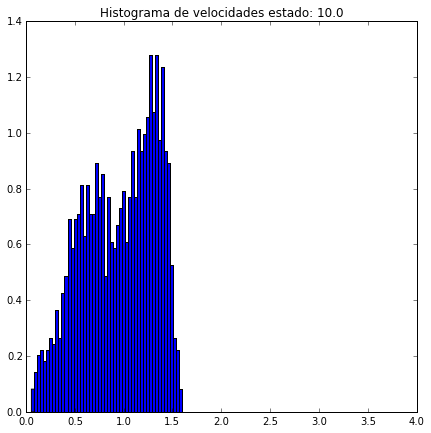

In [53]:
#Exiten 251 estados en la simulación, se pregunta por los estados que se quieran ver.
lect1=int(input('Enter the initial state(1-251)='))
lect2=int(input('Enter the final state (1-251)='))
numstate1=lect1*1600
numstate2=(lect2*1600)+1

#Se define una función que  haga un histograma del estado dado por parámetro
def histogramVelocity(state):
    hist(velocity[state-1600:state],bins=50,normed=True)
    xlim(0,4)
    title('Histograma de velocidades estado: %.1f'%(1.*state/1600))

#Se grafican el rango de los estados dados por el usuario
for i in range(numstate1,numstate2,1600): 
    figure(i)
    histogramVelocity(i)
    #name=str(i)+'.png' #Necesario para guardar cada imagen! 
    #savefig(name)
    show()


Enter the initial state(1-251)=178
Enter the final state (1-251)=179


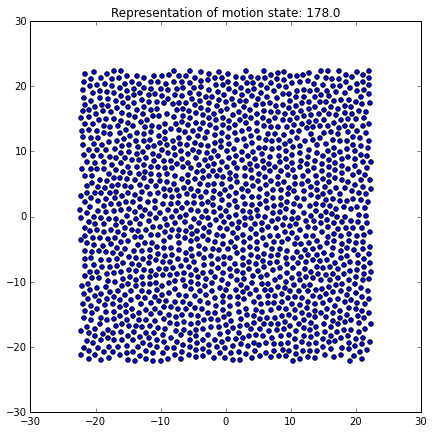

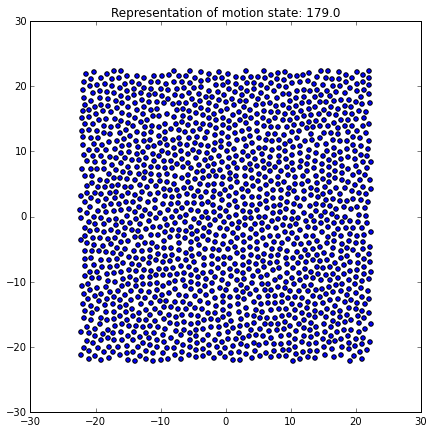

In [55]:
#Exiten 251 estados en la simulación, se pregunta por los estados que se quieran ver.
lect1=int(input('Enter the initial state(1-251)='))
lect2=int(input('Enter the final state (1-251)='))
numstate1=lect1*1600
numstate2=(lect2*1600)+1

#Se define una función que  haga una representación  del estado dado de las partículas dado por parámetro
def ParticleMotion(state):
    scatter(x[state-1600:state],y[state-1600:state])
    title('Representation of motion state: %.1f'%(1.*state/1600))

#Se grafican las representaciones en el rango dado por el usuario
for i in range(numstate1,numstate2,1600):
    figure(i)
    ParticleMotion(i)
    #name=str(i)+'.png'
    #savefig(name) #importante para guardar 
    show()


##Resultados
Los resultados muestran que en el movimiento de un gas caliente bajo una simulación se tiene que las velocidades se comportan de acuerdo a una distribución de Rayleigh. Además se puede ver [aquí](https://github.com/jjosealf94/MC/blob/master/Talleres/Experimentos/Exp1/HistogramVelocity.gif) como cambian el histograma de velocidades a medida que avanza la simulación y como poco a poco se va llegando a un equilibrio que muestra el comportamiento de distribución de Rayleigh.

Además se logró realizar una representación de la simulación [aquí](https://github.com/jjosealf94/MC/blob/master/Talleres/Experimentos/Exp1/ParticleMotion.gif), con el moviento de las partículas. 

Para poder realizar los anteriores gif fue necesario ejecutar los anteriores dos bloques de códigos desde el estado 1 hasta el estado 251 y descomentar el la sección que guarda las imágenes. Con las imagenes guardadas en diferentes carpetas se ejecutó la siguiente línea de código.

Para el gif con el histograma de velocidades
```
convert -delay 50 -loop 0 1600.png 8000.png 16000.png 24000.png 32000.png 40000.png 48000.png 56000.png 64000.png 72000.png 80000.png 88000.png 96000.png 104000.png 112000.png 120000.png 128000.png 136000.png 144000.png 152000.png 160000.png 168000.png 176000.png 184000.png 192000.png 200000.png 208000.png 216000.png 224000.png 232000.png 240000.png 248000.png 256000.png 264000.png 272000.png 280000.png 288000.png 296000.png 304000.png 312000.png 320000.png 328000.png 336000.png 344000.png 352000.png 360000.png 368000.png 376000.png 384000.png 392000.png 400000.png HistogramVelocity.gif

```
Para el gif con la representación del movimiento
```
convert -delay 50 -loop 0 1600.png 8000.png 16000.png 24000.png 32000.png 40000.png 48000.png 56000.png 64000.png 72000.png 80000.png 88000.png 96000.png 104000.png 112000.png 120000.png 128000.png 136000.png 144000.png 152000.png 160000.png 168000.png 176000.png 184000.png 192000.png 200000.png 208000.png 216000.png 224000.png 232000.png 240000.png 248000.png 256000.png 264000.png 272000.png 280000.png 288000.png 296000.png 304000.png 312000.png 320000.png 328000.png 336000.png 344000.png 352000.png 360000.png 368000.png 376000.png 384000.png 392000.png 400000.png ParticleMotion.gif

```
##Conclusiones
Se tienen finalmente varias conclusiones. La primera es el poder de cálculo que ofrece un computador es de vital de importancia en el desarrollo de la ciencia, ya que en el experimento anterior se llevaron grandes cálculos y se pudo manejar de manera eficiente el tiempo. La segunda conclusión es con respecto al ajuste de curvas, ya que es importante al momento de poder confirmar alguna hipótesis que se tenga sobre algún fénomeno. Finalmente se confirma que las velocidades en un gas caliente se comportan de acuerdo a la distribución de Rayleigh. 


##Referencia
https://en.wikipedia.org/wiki/Rayleigh_distribution

https://es.wikipedia.org/wiki/Potencial_de_Lennard-Jones